
#### Исследование влияния больших коэффициентов  в уравнении на точность в вычисленнии корней

1) Рассмотрим ошибку при коэффициенте  : $\alpha = \sqrt{3}$  \
В окрестности него ошибка резко возрастает , ибо при таком коэффициенте в одном из вычислений знаменатель равен нулю \
2) Рассмотрим ощибку при $\alpha \in [10,10^{14}]$ 
3) Рассмотрим ошибку при $\alpha \in [10^{14},10^{17}]$ \
    $S = \sqrt{\frac{a^6}{27} + \frac{2a^4}{3} + 3a^2}  $
    $\Delta x \approx \frac{S\Epsilon}{(S -a^2-1)^{2/3}} - \frac{S\Epsilon}{(-S -a^2-1)^{2/3}} $ \
    $\| \Delta x \| < \frac{S\Epsilon}{(S -a^2-1)^{2/3}}$
    $Lim_{a\rightarrow \inf}(\frac{S\Epsilon}{(S -a^2-1)^{2/3}}) = \frac{2}{\sqrt{3}}a\Epsilon$\

То есть при $a \approx \frac{1}{\Epsilon{\textbf{машинное}}}$ ошибка становится порядка 1 \
А при $a \in [10,10^{17}]$ имеем линейный рост ошибки с порядков $10^{-9}$ до порядка $10^0$ и выше 

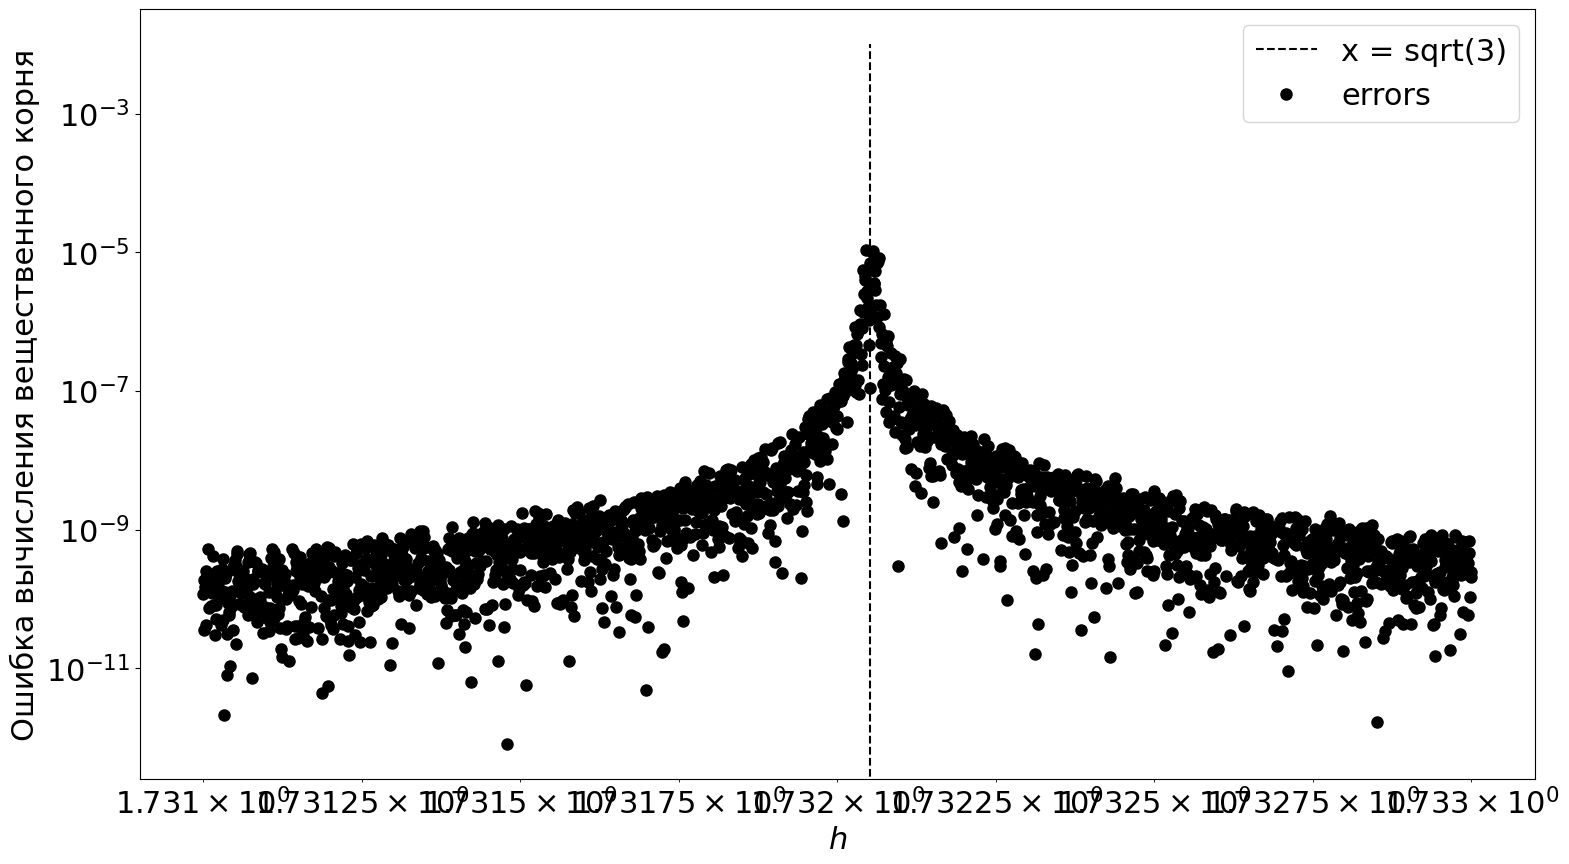

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', **{'size' : 22})

def error(array):
    res = []
    for a in array :
        S = np.sqrt(a**6/27+2/3*a**4+3*a**2)
        res.append(abs(np.cbrt(S -a**2 -1) + np.cbrt(-S-a**2-1)+2))
    return res 

h_array = np.arange(1.731, 1.733, 0.000001)
errors = error(h_array)

plt.figure(figsize=(18, 10))

sqrt3_array = np.arange(0.0 ,10**-2 ,10**-5)
sqrt_array = np.ones(len(sqrt3_array))*np.sqrt(3) 
# линия корня из 3
plt.loglog(sqrt_array, sqrt3_array, 'k--', ms=16, label='x = sqrt(3)')


# Ошибки при различных альфа в области корня из 3
plt.loglog(h_array, errors, 'k.', ms=16, label='errors')

plt.xlabel('$h$')
plt.ylabel('Ошибка вычисления вещественного корня')
plt.legend()

plt.show()

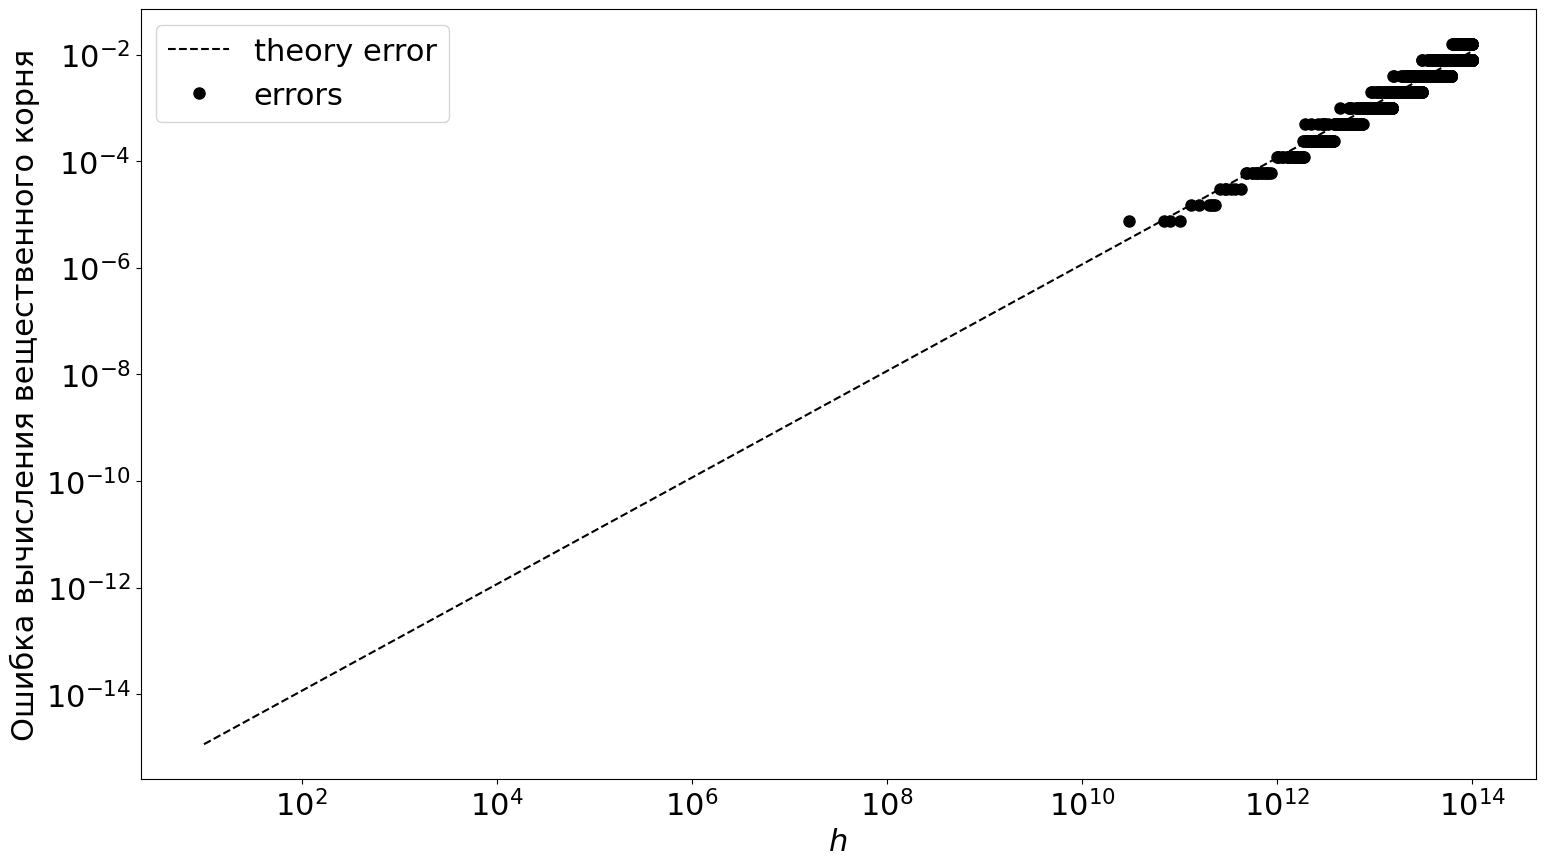

In [14]:

h_array = np.arange(10.0, 10.0**14,10**10 )

errors = error(h_array)

plt.figure(figsize=(18, 10))


theoretical_err = 2*h_array*10**-16/np.sqrt(3)

#Оценка на ошибку
plt.loglog(h_array, theoretical_err, 'k--', ms=16, label='theory error')


# Ошибки при различных альфа в области корня из 3
plt.loglog(h_array, errors, 'k.', ms=16, label='errors')

plt.xlabel('$h$')
plt.ylabel('Ошибка вычисления вещественного корня')
plt.legend()

plt.show()

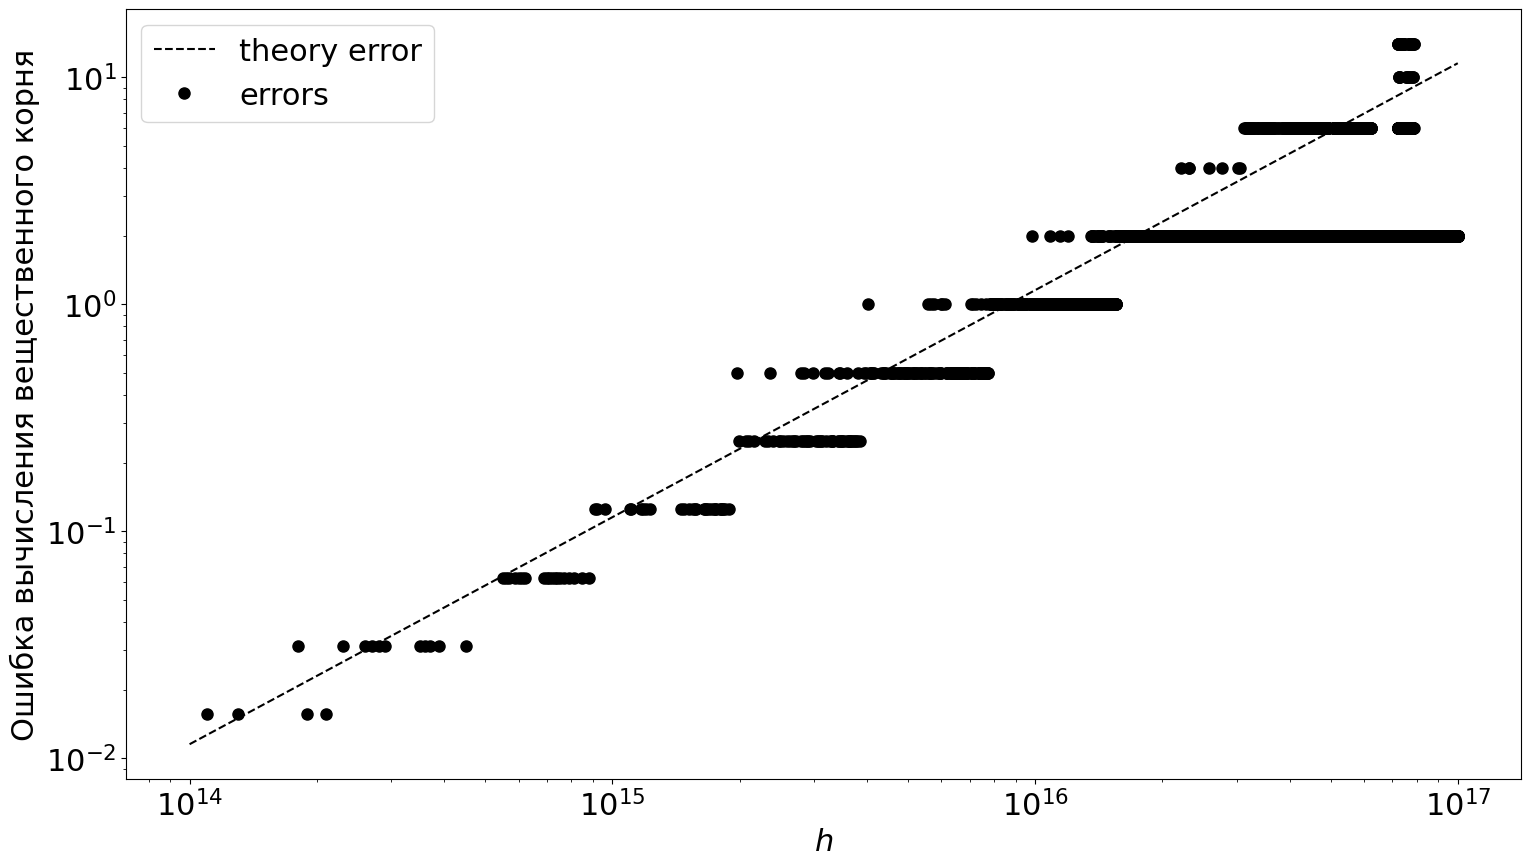

In [11]:

from xml.dom.expatbuilder import theDOMImplementation


h_array = np.arange(10.0**14, 10.0**17,10**13 )

errors = error(h_array)

plt.figure(figsize=(18, 10))

theoretical_err = 2*h_array*10**-16/np.sqrt(3)

#Оценка на ошибку
plt.loglog(h_array, theoretical_err, 'k--', ms=16, label='theory error')

# Ошибки при различных альфа в области корня из 3
plt.loglog(h_array, errors, 'k.', ms=16, label='errors')

plt.xlabel('$h$')
plt.ylabel('Ошибка вычисления вещественного корня')
plt.legend()

plt.show()

По последнему графику и предыдущим видим , что как и предполагалось : 
1) Ошибка достигает порядка $10^0$ при $\alpha $ порядка $\frac{1}{\epsilon_{\textbf{маш}}}$
2) Теоретическая ошибка неплохо апркосимирует экспериментальную ошибку 